# Eval

In [49]:
# I/O
import os
import glob
import json
import zlib
import base64

# Analysis
import tqdm
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
import umap

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Load SCENIC results

In [132]:
OUT = "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation/"
DATA = "CDH5"
EXP_LOOM = f"/cellar/users/aklie/data/igvf/topic_grn_links/endothelial_perturb_seq/preprocess/per_perturbation/{DATA}.loom"

## adata object

In [133]:
adata = sc.read(EXP_LOOM, validate=False)
genes = adata.var.index
cells = adata.obs.index

In [134]:
adata.obs["group"] = DATA 

## GRN Inference

In [135]:
from scenic_utils import read_adj, parse_adj

In [137]:
files = sorted(glob.glob(os.path.join(OUT, f"{DATA}*_adj.tsv")))
files

['/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation/CDH5_adj.tsv']

In [138]:
read_adj(files[0])

,TF,target,importance
0,H2AFZ,DLGAP5,3.879195e+01
1,HMGB1,DLGAP5,2.686232e+01
2,H2AFZ,HMMR,2.263702e+01
3,H2AFZ,HMGB3,2.041248e+01
4,EZR,NCAPG,1.788163e+01
...,...,...,...
90555,CHD2,JUN,2.474335e-16
90556,HHEX,KCNAB1,1.647088e-16
90557,DDIT3,SNCG,8.704511e-17
90558,RFX3,AHNAK,8.634646e-17


In [139]:
multi_adj, ranked_genes = parse_adj(files, tfs=None)

/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/scenic_utils.py:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ranks = ranks.reset_index().sort_values(["TF"]).groupby(["TF"], sort=False).apply(lambda x: x.sort_values(("rank", "mean"), ascending=True)).drop("TF", axis=1)


In [140]:
multi_adj

,TF,target,importance,file,rank
0,H2AFZ,DLGAP5,3.879195e+01,/cellar/users/aklie/projects/igvf/topic_grn_li...,1
1,HMGB1,DLGAP5,2.686232e+01,/cellar/users/aklie/projects/igvf/topic_grn_li...,1
2,H2AFZ,HMMR,2.263702e+01,/cellar/users/aklie/projects/igvf/topic_grn_li...,2
3,H2AFZ,HMGB3,2.041248e+01,/cellar/users/aklie/projects/igvf/topic_grn_li...,3
4,EZR,NCAPG,1.788163e+01,/cellar/users/aklie/projects/igvf/topic_grn_li...,1
...,...,...,...,...,...
90555,CHD2,JUN,2.474335e-16,/cellar/users/aklie/projects/igvf/topic_grn_li...,828
90556,HHEX,KCNAB1,1.647088e-16,/cellar/users/aklie/projects/igvf/topic_grn_li...,811
90557,DDIT3,SNCG,8.704511e-17,/cellar/users/aklie/projects/igvf/topic_grn_li...,479
90558,RFX3,AHNAK,8.634646e-17,/cellar/users/aklie/projects/igvf/topic_grn_li...,637


In [141]:
ranked_genes

TF      target  rank    importance     
                            mean          mean  std
0       AHCTF1       KIFC1   1.0  5.667926e+00  0.0
1       AHCTF1      MT-CO3   2.0  5.315293e+00  0.0
2       AHCTF1    TMEM106C   3.0  5.184832e+00  0.0
3       AHCTF1      MAD2L1   4.0  4.448898e+00  0.0
4       AHCTF1       MANCR   5.0  4.401994e+00  0.0
...        ...         ...   ...           ...  ...
90555  ZSCAN18  AC091057.6  73.0  9.890536e-06  0.0
90556  ZSCAN18       HMOX1  74.0  2.153676e-07  0.0
90557  ZSCAN18        TFEC  75.0  1.009603e-08  0.0
90558  ZSCAN18         TK1  76.0  2.013070e-09  0.0
90559  ZSCAN18     NECTIN4  77.0  1.152148e-09  0.0

[90560 rows x 5 columns]

## Regulon files

In [142]:
files = sorted(glob.glob(os.path.join(OUT, f"{DATA}*_reg.csv")))

In [143]:
files

['/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation/CDH5_reg.csv']

In [145]:
regulons = pd.read_csv(files[0], skiprows=3, header=None)
regulons.columns = ["TF", "MotifID", "AUC", "NES", "MotifSimilarityQValue", "OrthologousIdentity" , "Annotation", "Context", "TargetGenes", "RankAtMax"]

In [146]:
regulons[["TF", "NES", "TargetGenes"]].head()

,TF,NES,TargetGenes
0,ETS2,3.854928,"[('COL5A1', 0.6006782428065109), ('TCF15', 0.6..."
1,HES7,3.272743,"[('UGCG', 1.2415856830287553), ('RAB3C', 0.946..."
2,KLF9,3.163237,"[('NFATC2', 1.2124102466484905), ('TJP2', 0.79..."
3,NR2F2,3.164475,"[('NLGN1', 0.6682411765978367), ('CRIM1', 0.88..."
4,ATF5,3.502397,"[('JAK1', 1.2910998040924453), ('SV2A', 1.5289..."


## Loom files - regulons and AUC

In [147]:
from scenic_utils import parse_loom

In [148]:
files = sorted(glob.glob(os.path.join(OUT, f"{DATA}*_pyscenic_output.loom")))
files

['/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation/CDH5_pyscenic_output.loom']

In [149]:
tf_regulons, tf_activities = parse_loom(files, tf="CEBPB", cells=cells, genes=genes)

/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation/CDH5_pyscenic_output.loom


In [150]:
tf_regulons

Gene
STMN1        1
PALMD        1
SMC1A        1
PCNT         1
CD3EAP       1
POU2F2       1
CCDC68       1
SULT1A1      1
GALNT6       1
SLC38A1      1
FOSL1        1
FEN1         1
DKK3         1
TJP2         1
KLF10        1
NCAPG2       1
HNRNPA2B1    1
SGK1         1
MMS22L       1
TUBB         1
STC2         1
MAP1B        1
EMCN         1
NFKBIZ       1
NKTR         1
ODC1         1
RRM2         1
HMGB3        1
dtype: int64

In [151]:
tf_activities

,/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation/CDH5_pyscenic_output.loom
CellID,
CDH5:GCCAGCTGGAAAACCTGAAG:CCACGAGAGTAGGCCA-scRNAseq_2kG_11AMDox_1,0.009643
CDH5:GTCAGCCGACCGTCTTTGGA:GTCACGGAGGGCAGTT-scRNAseq_2kG_11AMDox_1,0.000000
CDH5:GAGCCAGGCCTCCCTCGCCAG:GTCTCACTCAGCAATC-scRNAseq_2kG_11AMDox_1,0.020714
CDH5:GTCAGCCGACCGTCTTTGGA:TACCCACAGAGCAGCT-scRNAseq_2kG_11AMDox_1,0.003929
CDH5:GCAATAACAGGAAACCATCCC:AGAACAATCGTGTGAT-scRNAseq_2kG_11AMDox_2,0.000000
...,...
CDH5:GGCTCCCCTCCAAAGACGGT:CGAATTGCAACTGGTT-scRNAseq_2kG_2PMDox2_7,0.016429
CDH5:GCGTCCAGGGCTGAGCGTGAG:CTGAGCGTCGAAGGAC-scRNAseq_2kG_2PMDox2_7,0.011429
CDH5:GCTGCAGATAGGCAGGCCCTG:CTGCTCATCCACCCTA-scRNAseq_2kG_2PMDox2_7,0.017143


## Get reproducible regulons

In [152]:
files = sorted(glob.glob(os.path.join(OUT, f"{DATA}*_pyscenic_output.loom")))
files

['/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation/CDH5_pyscenic_output.loom']

In [153]:
tf_list = np.loadtxt('/cellar/users/aklie/opt/shared/SCENIC/tf_lists/allTFs_hg38.txt', dtype=str)
tf_df = pd.Series(index=tf_list, data=np.zeros((len(tf_list))))
num_runs = 0
num_regs = []
for i, file in enumerate(tqdm.tqdm(files)):
    if os.stat(file).st_size > 0:
        num_runs = num_runs + 1
        lf = lp.connect(file, mode='r+', validate=False)
        auc_mtx = pd.DataFrame(lf.ca.RegulonsAUC, index=lf.ca.CellID)
        num_regs.append(auc_mtx.shape[1])
        regs = [reg.replace('(+)', '') for reg in list(auc_mtx.columns)]
        for reg in regs:
            tf_df.loc[reg] = tf_df.loc[reg] + 1 
        lf.close()

100%|██████████| 1/1 [00:00<00:00, 46.33it/s]


In [154]:
tf_threshold = 0.8
re_occuring_tfs = tf_df[(tf_df/num_runs >= tf_threshold)]
re_occuring_tfs.head()

PRDM1      1.0
HES7       1.0
CREB3L1    1.0
CEBPB      1.0
CEBPD      1.0
dtype: float64

In [35]:
target_df = pd.DataFrame(index=re_occuring_tfs.index, data=np.zeros((len(re_occuring_tfs.index), len(adata.var.index))), columns=adata.var.index)
num_runs = len(files)
regulons = {}
for i, file in enumerate(tqdm.tqdm(files)):
    lf = lp.connect(file, mode='r+', validate=False)
    for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
        regulons[i] =  list(r[r==1].index.values)
    for specific_tf in target_df.index:
        if (specific_tf + '(+)') in regulons:
            targets = regulons[specific_tf + '(+)']
            for target in targets:
                if target in target_df.columns:
                    target_df.loc[specific_tf][target] = target_df.loc[specific_tf][target] + 1 
    lf.close()

100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


In [130]:
# Melt the dataframe
target_df = target_df.stack().reset_index()

In [131]:
#
sns.countplot

,level_0,Gene,0
0,WT1,HES4,0.0
1,WT1,ISG15,0.0
2,WT1,MMP23B,0.0
3,WT1,LINC00337,0.0
4,WT1,ERRFI1,0.0
...,...,...,...
67995,BCLAF1,MT-ND3,0.0
67996,BCLAF1,MT-ND4,0.0
67997,BCLAF1,MT-ND5,0.0
67998,BCLAF1,MT-ND6,0.0


In [36]:
# Build the regulons with target genes
target_threshold = 0.8
reg_target_dict = {}
reg_lens = []
for reg, row in target_df.iterrows():
    re_occur_targets = row[(row/num_runs >= target_threshold)].index
    re_occur_tuple = [(target, 1) for target in re_occur_targets]
    if len(re_occur_tuple) >= 2:
        reg_lens.append(len(re_occur_tuple))
        reg_target_dict.setdefault(reg, []).append(re_occur_tuple)
    else:
        print(reg)
    
reg_target_df = pd.DataFrame(index=reg_target_dict.keys(), data=reg_target_dict.values()).reset_index()
num_regs = len(reg_target_df.index)
reg_target_df.columns = ['TF', 'TargetGenes']
reg_target_df['MotifID'] = 'No motif'
reg_target_df['AUC'] = 0
reg_target_df['Annotation'] = 'gene is directly annotated'
reg_target_df['Context'] = "frozenset({'top100', '100_scenic_runs', 'activating'})"
reg_target_df['MotifSimilarityQvalue'] = 0
reg_target_df['NES'] = 4.0
reg_target_df['OrthologousIdentity'] = 0
reg_target_df['RankAtMax'] = 0.0

NFATC2
NR2F1
SOX7
FOXA1
NR1D2


In [37]:
reg_target_df.to_csv(os.path.join(OUT, f"{DATA}_reproducible_reg.csv"), index=False)

In [92]:
%%bash
DIR=/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation
cd $DIR
FILE=neg_control_reproducible_reg.csv
sed '1d' $FILE > tmpfile; mv tmpfile $FILE
echo -e ",,Enrichment,Enrichment,Enrichment,Enrichment,Enrichment,Enrichment,Enrichment,Enrichment\n,,AUC,Annotation,Context,MotifSimilarityQvalue,NES,OrthologousIdentity,RankAtMax,TargetGenes\nTF,MotifID,,,,,,,," \
    | cat - $FILE > temp && mv temp $FILE

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


In [ ]:
%%bash
source activate /cellar/users/aklie/opt/miniconda3/envs/scverse-py38
EX_MTX=/cellar/users/aklie/data/igvf/topic_grn_links/endothelial_perturb_seq/preprocess/per_perturbation/neg_control.loom"
REGS=/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/per_perturbation/neg_control_reproducible_reg.csv
pyscenic aucell $EX_MTX $REGS --output neg_control_reproducible_reg.loom --num_workers 2

## Get regulons

In [39]:
repr_loom_file = os.path.join(OUT, f"{DATA}_reproducible_reg.loom")

In [155]:
# collect SCENIC AUCell output
lf = lp.connect(files[0], mode='r+', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

# create a dictionary of regulons:
regulons = {}
for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
    regulons[i] =  list(r[r==1].index.values)
lf.close()

In [156]:
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss

In [157]:
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)

Text(0.5, -7.125, '')

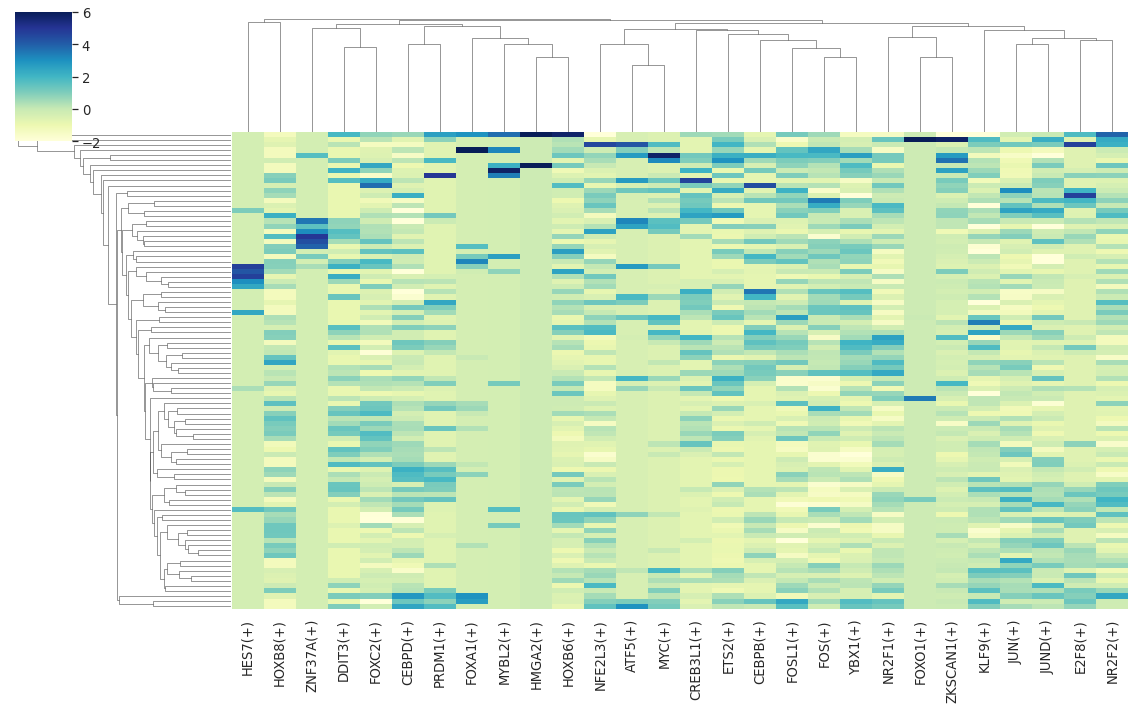

In [158]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z.dropna(axis=1), cmap='YlGnBu',linecolor='gray', 
                   square=False, xticklabels=True, yticklabels=False,
                   vmin=-2, vmax=6, col_cluster=True,  
                   figsize=(16,10))
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')

/cellar/users/aklie/opt/miniconda3/envs/scverse-py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HES7(+)', ylabel='Density'>

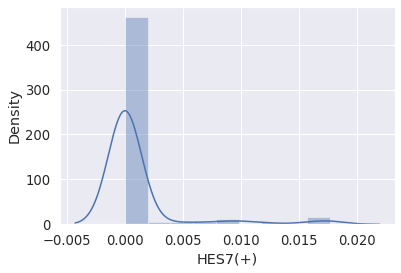

In [161]:
tf = "HES7(+)"
sns.distplot(auc_mtx[tf], norm_hist=True)

<AxesSubplot:xlabel='CEBPD(+)', ylabel='Density'>

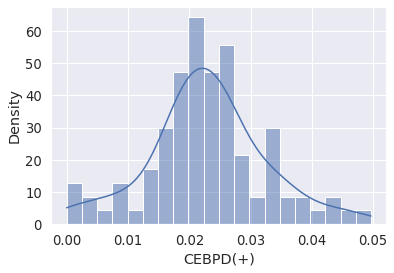

In [160]:
tf = "CEBPD(+)"
sns.histplot(auc_mtx[tf], stat='density', kde=True, bins=20)

In [47]:
auc_mtx.mean(axis=0).sort_values(ascending=False).head(10)

YBX1(+)      0.102323
MAFB(+)      0.042083
CEBPB(+)     0.033782
JUND(+)      0.032271
SMAD3(+)     0.031590
NFE2L3(+)    0.019408
WT1(+)       0.014537
BCLAF1(+)    0.014390
E2F8(+)      0.011893
E2F1(+)      0.009354
dtype: float64

In [162]:
rss = regulon_specificity_scores(auc_mtx=auc_mtx, cell_type_series=adata.obs["group"])

Text(0.5, 0, '')

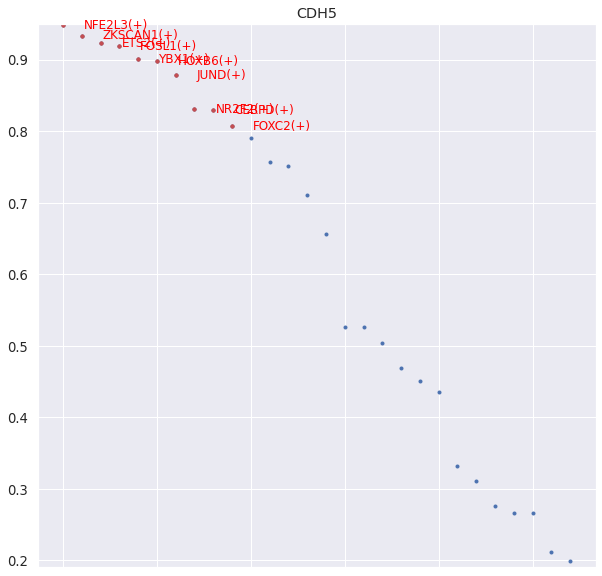

In [163]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_rss(rss=rss, cell_type=DATA, top_n=10, ax=ax)
for t in ax.texts:
    t.set_fontsize(12)
ax.set_ylabel('')
ax.set_xlabel('')

In [164]:
top_regulons = rss.T[DATA].sort_values(ascending=False)[:10].index

In [165]:
type_mapping = {}
regulon_mapping = {}
tfs = [tf.replace('(+)', '') for tf in top_regulons]
for tf in tfs:
    type_mapping[tf] = 'RE'
    regulon_mapping[tf] = tf
    for item in regulons[tf+'(+)']:
        if item not in tfs:
            type_mapping[item] = "Gene"
            regulon_mapping[item] = tf
mapping_df = pd.DataFrame(index=type_mapping.keys(), data=type_mapping.values())
mapping_df.columns = ['Type']
mapping_df['Regulon'] = regulon_mapping.values()
mapping_df.to_csv(os.path.join(OUT, f"{DATA}_node_mapping.tsv"), sep='\t')

In [166]:
total_genes = 0
gene_set = set()
all_output = ''
tfs = [tf.replace('(+)', '') for tf in top_regulons]
let_know = 'Regulons for: {}'.format("neg_control")
print(let_know)
print('-'*len(let_know))
for tf in tfs:
    other_regulons = 0
    regulon_genes = regulons[tf+'(+)']
    for tf_reg in tfs:
        if (tf_reg != tf) and (tf_reg in regulon_genes):
            other_regulons += 1
    [gene_set.add(gene) for gene in regulon_genes]
    regulon_genes
    total_genes += len(regulons[tf+"(+)"])
    print(f'{tf} regulon: {len(regulons[tf+"(+)"])} genes', end=' ')
    print('({} other TFs in {} regulons)'.format(other_regulons, tf))
    with open(os.path.join(OUT, f"{DATA}_{tf}_regulon.txt"), "w") as f:
        for item in regulons[tf+'(+)']:
            f.write("%s\t%s\n" % (tf, item))
            all_output += ("%s\t%s\n" % (tf, item))
with open(os.path.join(OUT, f"{DATA}_regulons.txt"), "w") as f:
    f.write(all_output)
print("{} total genes across {} regulons".format(total_genes, "neg_control"))
print("{} unique genes across {} regulons".format(len(gene_set), "neg_control"))
print("-"*len(let_know))
print()

Regulons for: neg_control
-------------------------
NFE2L3 regulon: 55 genes (0 other TFs in NFE2L3 regulons)
ZKSCAN1 regulon: 24 genes (0 other TFs in ZKSCAN1 regulons)
ETS2 regulon: 70 genes (0 other TFs in ETS2 regulons)
FOSL1 regulon: 180 genes (1 other TFs in FOSL1 regulons)
YBX1 regulon: 29 genes (0 other TFs in YBX1 regulons)
HOXB6 regulon: 14 genes (0 other TFs in HOXB6 regulons)
JUND regulon: 15 genes (0 other TFs in JUND regulons)
NR2F2 regulon: 57 genes (0 other TFs in NR2F2 regulons)
CEBPD regulon: 29 genes (0 other TFs in CEBPD regulons)
FOXC2 regulon: 22 genes (0 other TFs in FOXC2 regulons)
495 total genes across neg_control regulons
396 unique genes across neg_control regulons
-------------------------



## Visualize the AUC matrix

In [167]:
# collect SCENIC AUCell output
lf = lp.connect(repr_loom_file, mode='r+', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

# create a dictionary of regulons:
regulons = {}
for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
    regulons[i] =  list(r[r==1].index.values)
lf.close()

In [168]:
# UMAP
run_umap = umap.UMAP(n_neighbors=10, min_dist=0.4, metric='correlation').fit_transform

In [169]:
dr_umap = run_umap(auc_mtx)

In [170]:
umap_df = pd.DataFrame(dr_umap, columns=['X', 'Y'], index=auc_mtx.index)

In [171]:
# Make category
umap_df["sample"] = adata.obs["sample"]
umap_df["sample"] = umap_df["sample"].astype("category")

# Add CEBPD(+) activity as column
umap_df["CEBPD(+)"] = auc_mtx["CEBPD(+)"]

# Add SOX18(+) activity as column
#umap_df["SOX18(+)"] = auc_mtx["SOX18(+)"]

# Add FOS(+) activity as column
#umap_df["FOS(+)"] = auc_mtx["FOS(+)"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


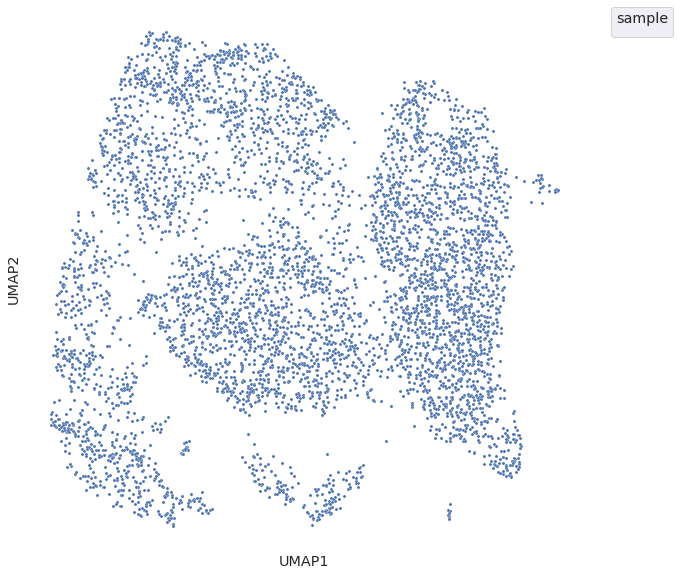

In [172]:
# figure size
plt.figure(figsize=(10,10))

# make a scatter plot where the color is the sample and have a legend two columns and on the right
sns.scatterplot(data=umap_df, x="X", y="Y", hue="sample", palette="tab10", legend="full", s=10)
 
# Move legend to the right and make it two columns
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2, title="sample", fontsize=12)

# clean up the plot
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

# Make white with no grid internal grid lines
plt.gca().set_facecolor('white')

# bring back spines
sns.despine()

# Remove tick labels
plt.tick_params(labelbottom=False, labelleft=False)

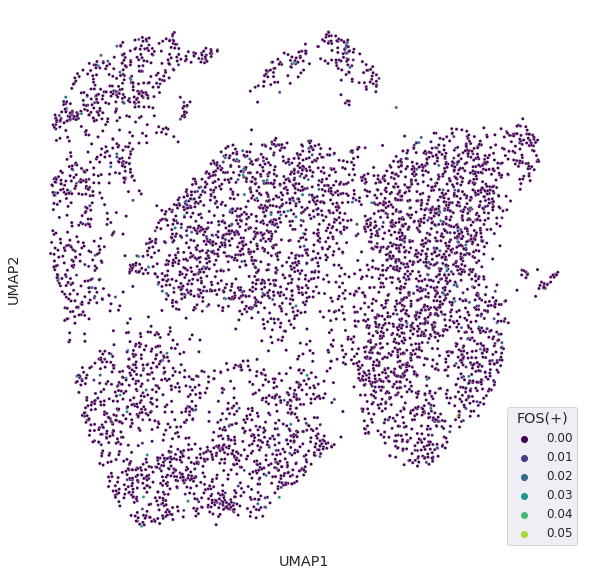

In [125]:
# figure size
plt.figure(figsize=(10,10))

# make a scatter plot where the color is CEBPD(+), make sure color is a continuous scale
sns.scatterplot(data=umap_df, x="X", y="Y", hue="FOS(+)", palette="viridis", s=10)

# move legened to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# clean up the plot
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

# Make white with no grid internal grid lines
plt.gca().set_facecolor('white')

# bring back spines
sns.despine()

# add title to legend and make text bigger
plt.legend(title="FOS(+)", fontsize=12)

# Remove tick labels
plt.tick_params(labelbottom=False, labelleft=False)

In [111]:
auc_mtx

,BCLAF1(+),BHLHE41(+),BRCA1(+),CEBPB(+),CEBPD(+),DDIT3(+),E2F1(+),E2F7(+),E2F8(+),FOS(+),...,MYBL1(+),MYBL2(+),NFE2L3(+),POU2F2(+),RFX3(+),SMAD3(+),SOX18(+),WT1(+),YBX1(+),ZNF37A(+)
safe-targeting:GCCAAGTGGACTAGAAGCCG:AACGTCAGTTGGAGGT-scRNAseq_2kG_11AMDox_1,0.004839,0.0,0.0,0.033057,0.0,0.0,0.007580,0.000000,0.010085,0.000000,...,0.001148,0.0,0.007941,0.040,0.002500,0.018119,0.0,0.000,0.094792,0.000000
safe-targeting:GTACACATCTTCCCAATCAG:AACTTCTTCGCGCTGA-scRNAseq_2kG_11AMDox_1,0.019032,0.0,0.0,0.033316,0.0,0.0,0.007962,0.005000,0.010254,0.000000,...,0.000000,0.0,0.011176,0.000,0.009375,0.029901,0.0,0.075,0.112292,0.006038
safe-targeting:GACAACCTGGTTACCCTCAC:AAGACTCGTTGCGGCT-scRNAseq_2kG_11AMDox_1,0.005323,0.0,0.0,0.040725,0.0,0.0,0.006051,0.000000,0.013644,0.000000,...,0.000000,0.0,0.011471,0.000,0.011250,0.019208,0.0,0.000,0.112500,0.001132
safe-targeting:GCCAACTACCACAAACCAAC:AAGACTCTCTAATTCC-scRNAseq_2kG_11AMDox_1,0.014839,0.0,0.0,0.028705,0.0,0.0,0.008089,0.006375,0.011695,0.000000,...,0.000000,0.0,0.020294,0.064,0.000000,0.035446,0.0,0.000,0.099375,0.008491
safe-targeting:GACTGGAATTCACATCCACA:AAGATAGAGACCAAGC-scRNAseq_2kG_11AMDox_1,0.002097,0.0,0.0,0.028238,0.0,0.0,0.007452,0.000000,0.010763,0.000000,...,0.000000,0.0,0.010588,0.000,0.000000,0.020198,0.0,0.000,0.094167,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
safe-targeting:GTCTTTGGAAACAACCATGT:TTTACCAGTCAATGGG-scRNAseq_2kG_2PMDox2_7,0.027258,0.0,0.0,0.039275,0.0,0.0,0.009745,0.009375,0.013305,0.000000,...,0.000000,0.0,0.000000,0.000,0.000000,0.017129,0.0,0.000,0.127708,0.020755
safe-targeting:GCTCATGAGACACTTCACAG:TTTACGTAGCGATGAC-scRNAseq_2kG_2PMDox2_7,0.008065,0.0,0.0,0.033627,0.0,0.0,0.005541,0.010625,0.009492,0.022381,...,0.007869,0.0,0.051176,0.000,0.026250,0.035446,0.0,0.000,0.088750,0.011132
safe-targeting:GCTTAAGACAGTCAAAGGAA:TTTACGTGTGTGCCTG-scRNAseq_2kG_2PMDox2_7,0.010806,0.0,0.0,0.039016,0.0,0.0,0.004777,0.000375,0.008136,0.000000,...,0.000000,0.0,0.000294,0.000,0.000000,0.021089,0.0,0.000,0.084792,0.000000
safe-targeting:GGATTGGTCAAAGTGTATCA:TTTCGATAGACAGCTG-scRNAseq_2kG_2PMDox2_7,0.012097,0.0,0.0,0.034870,0.0,0.0,0.005096,0.000625,0.012203,0.000000,...,0.005246,0.0,0.018235,0.000,0.000000,0.018119,0.0,0.090,0.092083,0.007358


---

# Scratch